<h1>Distances


In [1]:
import pandas as pd


In [8]:
df = pd.read_csv('distances_from_full_graph.csv', sep=',')
pd.options.display.max_colwidth = 170
df

,url_from,url_to,distance,path
0,Dwayne Johnson,Chris Hemsworth,2,Dwayne Johnson -> Jumanji: The Next Level -> Karen Gillan -> Avengers: Endgame -> Chris Hemsworth
1,Dwayne Johnson,Robert Downey Jr.,2,Dwayne Johnson -> Jumanji: The Next Level -> Karen Gillan -> Avengers: Endgame -> Robert Downey Jr.
2,Dwayne Johnson,Akshay Kumar,4,Dwayne Johnson -> Fast & Furious Presents: Hobbs & Shaw -> Jason Statham -> The Meg -> Winston Chao -> Kabali -> Radhika Apte -> Pad Man -> Akshay Kumar
3,Dwayne Johnson,Jackie Chan,3,Dwayne Johnson -> Fast & Furious Presents: Hobbs & Shaw -> Jason Statham -> The Meg -> Winston Chao -> Skiptrace -> Jackie Chan
4,Dwayne Johnson,Bradley Cooper,2,Dwayne Johnson -> Jumanji: The Next Level -> Karen Gillan -> Avengers: Endgame -> Bradley Cooper
5,Dwayne Johnson,Adam Sandler,3,Dwayne Johnson -> Skyscraper -> Neve Campbell -> Walter -> Milo Ventimiglia -> Sandy Wexler -> Adam Sandler
6,Dwayne Johnson,Scarlett Johansson,2,Dwayne Johnson -> Jumanji: The Next Level -> Karen Gillan -> Avengers: Endgame -> Scarlett Johansson
7,Dwayne Johnson,Sofía Vergara,3,Dwayne Johnson -> Jumanji: The Next Level -> Alex Wolff -> Bad Education -> Ray Romano -> Grilled -> Sofía Vergara
8,Dwayne Johnson,Chris Evans,2,Dwayne Johnson -> Jumanji: The Next Level -> Karen Gillan -> Avengers: Endgame -> Chris Evans
9,Chris Hemsworth,Robert Downey Jr.,1,Chris Hemsworth -> Avengers: Endgame -> Robert Downey Jr.


<h1>Graphs

In [3]:
import math
import networkx as nx
from matplotlib import pyplot as plt

%matplotlib inline

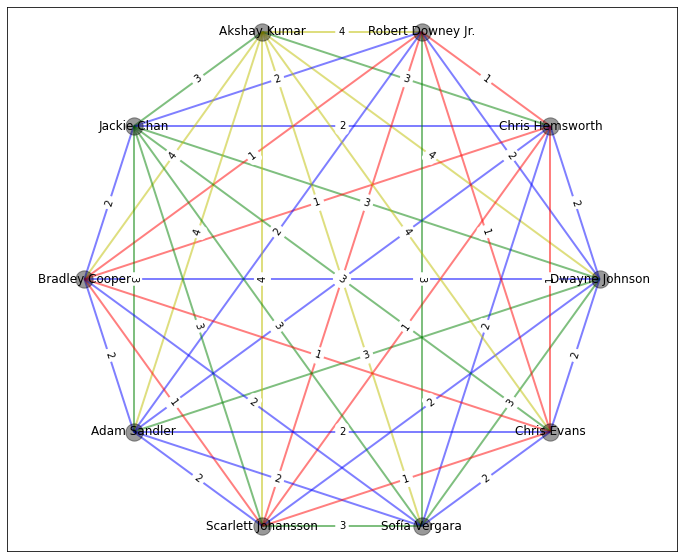

In [4]:
plt.figure(figsize=(12, 10))
plt.margins(x=0.15)
G = nx.Graph()
nodes = df['url_from'].unique().tolist()
G.add_nodes_from(nodes)


colors = ['', 'r', 'b', 'g', 'y', 'c', 'm']

distances = list(zip(df['url_from'].tolist(), df['url_to'].tolist(), df['distance'].tolist()))
edges = [el for el in distances if el[2] < math.inf]

for el in edges:
    G.add_edge(el[0], el[1], weight=el[2], label=el[2], color=colors[el[2]])

edge_colors = list(nx.get_edge_attributes(G, 'color').values())
edge_labels = nx.get_edge_attributes(G, 'label')
pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='k', alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=12)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color=edge_colors)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels);
plt.savefig('graph_all_distances.png')
plt.show()


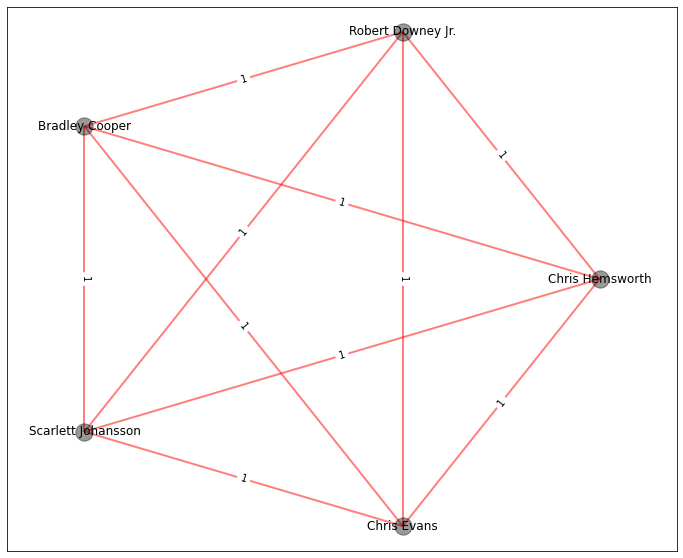

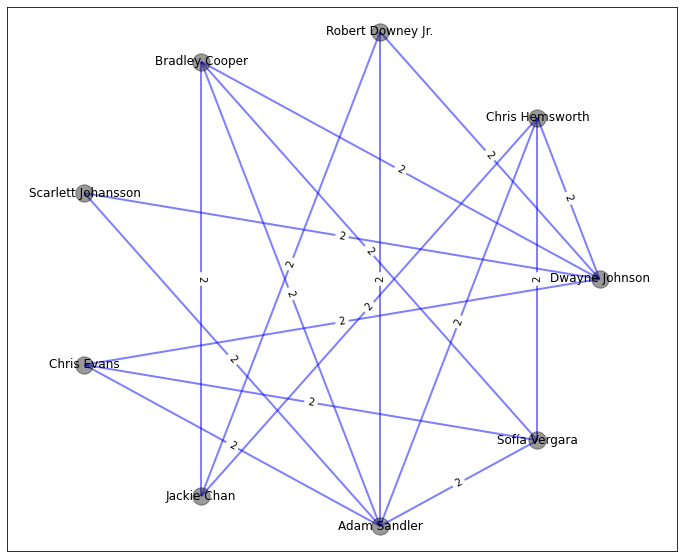

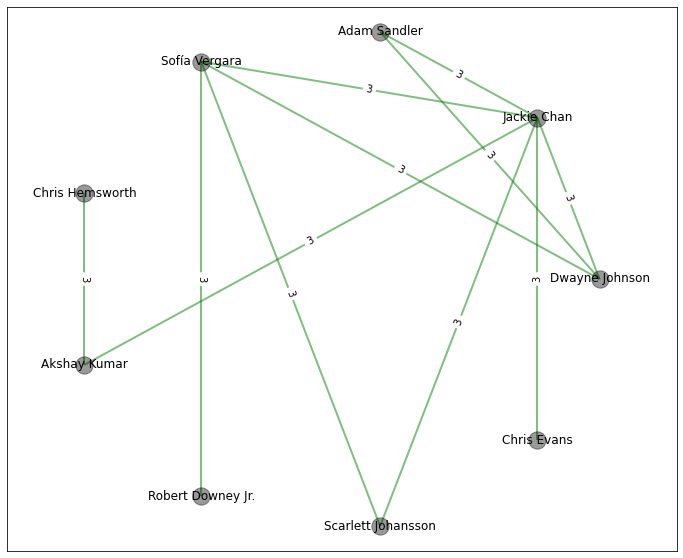

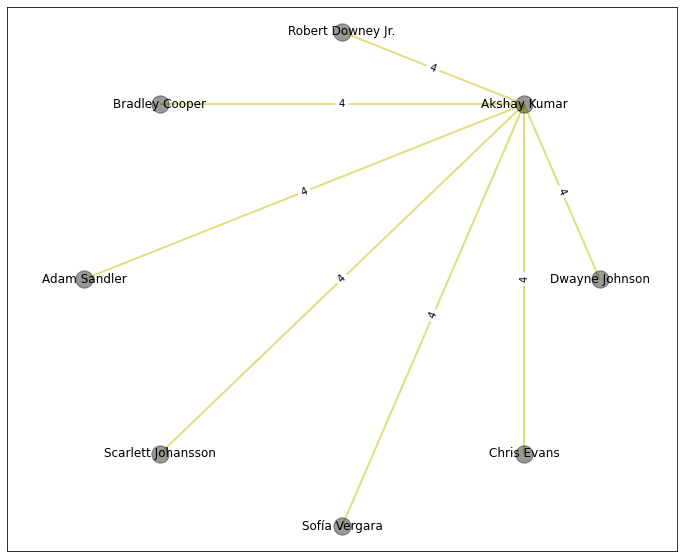

In [5]:
dist_values = df['distance'].unique().tolist()
dist_values = sorted([num for num in dist_values if num < math.inf])

for i in dist_values:
    plt.figure(figsize=(12, 10))
    plt.margins(x=0.15)
    G_part = nx.Graph()
    edges = [el for el in distances if el[2] == i]
    for el in edges:
        G_part.add_edge(el[0], el[1], weight=el[2], label=el[2], color=colors[i])
    edge_colors = list(nx.get_edge_attributes(G_part, 'color').values())
    edge_labels = nx.get_edge_attributes(G_part, 'label')
    pos = nx.shell_layout(G_part)
    nx.draw_networkx_nodes(G_part, pos, node_size=300, node_color='k', alpha=0.4)
    nx.draw_networkx_labels(G_part, pos, font_size=12)
    nx.draw_networkx_edges(G_part, pos, width=2, alpha=0.5, edge_color=edge_colors)
    nx.draw_networkx_edge_labels(G_part, pos, edge_labels=edge_labels);
    plt.savefig(f'graph_distance_{i}.png')
    plt.show()
    G_part.clear()

<h1> Worldcloud

In [6]:
import string
from wordcloud import WordCloud, STOPWORDS


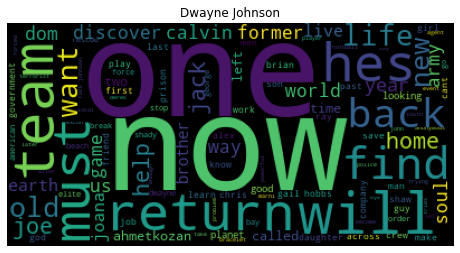

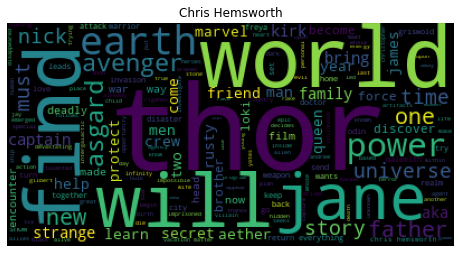

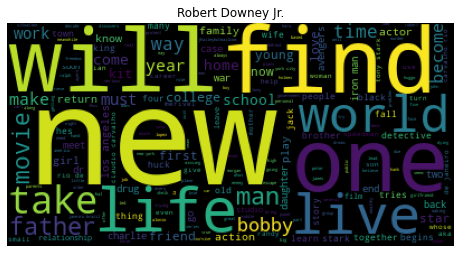

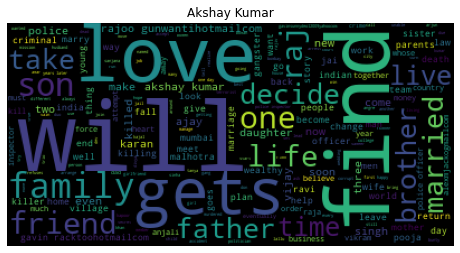

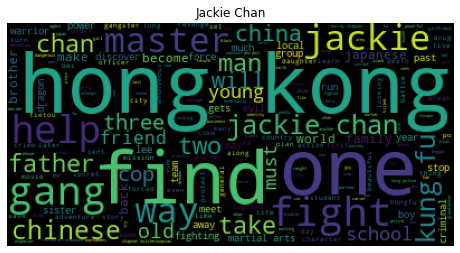

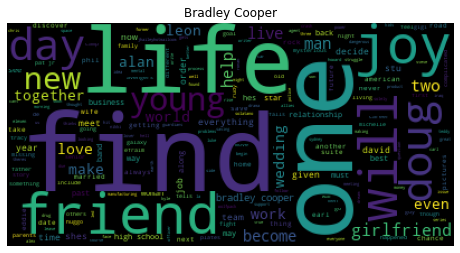

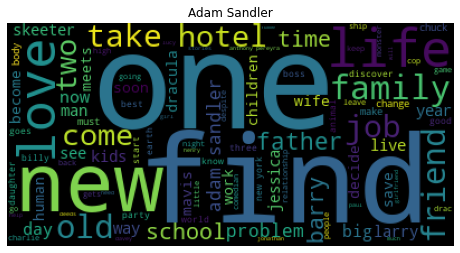

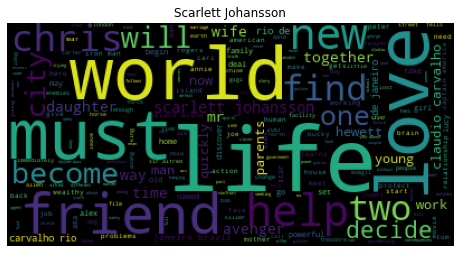

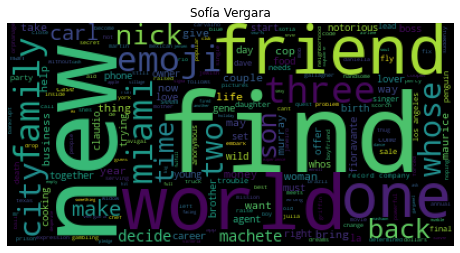

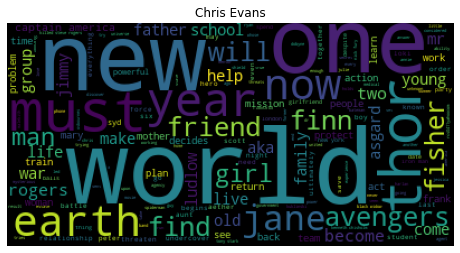

In [7]:
stopwords = set(STOPWORDS)
actors = ['Dwayne Johnson', 'Chris Hemsworth', 'Robert Downey Jr.',
          'Akshay Kumar', 'Jackie Chan', 'Bradley Cooper',
          'Adam Sandler', 'Scarlett Johansson', 'Sofía Vergara', 'Chris Evans']

tt = str.maketrans(dict.fromkeys(string.punctuation))

for actor in actors:
    with open(f'{actor}.txt', 'r', encoding='utf-8') as file:
        description = ' '.join(file.read().translate(tt).lower().split())
        plt.figure(figsize=(8, 8))
        plt.margins(x=0.15)
        cloud = WordCloud(stopwords=stopwords,
                          background_color='black').generate(description)
        plt.title(actor)
        plt.axis('off')
        plt.imshow(cloud)
        plt.savefig(f'{actor}.png')